In [120]:
%matplotlib inline
import matplotlib as plt
import pandas as pd
from datetime import datetime

In [2]:
from IPython.core.display import HTML
css = open("styles/style-table.css").read() + open('styles/style-notebook.css').read() + open("styles/test.css").read()
HTML('<style>{}</style>'.format(css))

In [136]:
dtypes=[str,datetime.date,int,int,int,int]
threemonth_metrics = pd.read_csv("raw_data/three-month-export_2016-04-04.csv",parse_dates=[1])
threemonth_metrics.head()

,item_title,release_date,downloads__april,downloads__march,downloads__february,downloads__total
0,TBP50 - Not Giving a Good Got Damn,2016-04-04 10:24:41,114,0,0,114
1,TBP49 - Welterweight Gold,2016-03-31 10:47:53,330,253,0,583
2,"TBP48 - Inertia, My Friend!",2016-03-27 18:30:33,27,460,0,487
3,TBP47 - Bottoms Up 4,2016-03-20 05:09:56,13,399,0,412
4,TBP46 - The Fundamental Conflict,2016-03-13 19:10:34,10,637,0,647


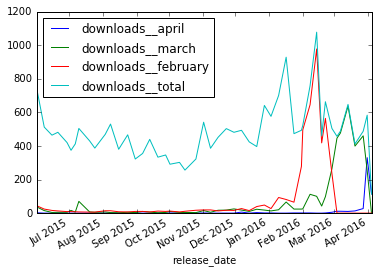

In [156]:
threemonth_metrics.plot(x='release_date')

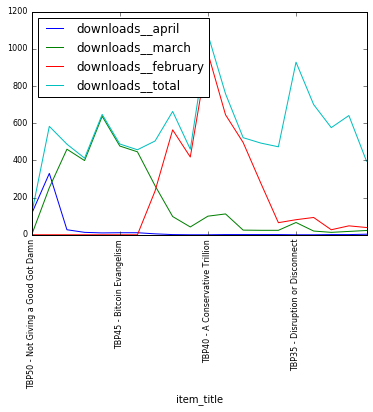

In [51]:
threemonth_metrics[0:20].plot(rot=90, fontsize=8)

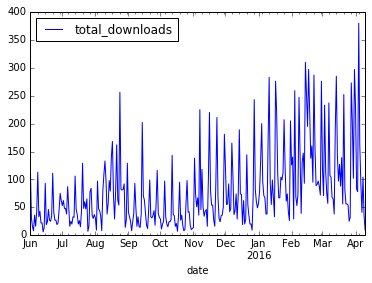

In [157]:
daily_metrics = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-12.csv", index_col=None, parse_dates=[0])
daily_metrics_old = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-04.csv", index_col=None, parse_dates=[0])
daily_metrics.plot(x='date',y='total_downloads')

In [155]:
daily_metrics.tail()

,date,total_downloads
310,2016-04-06,92
311,2016-04-07,41
312,2016-04-08,104
313,2016-04-09,35
314,2016-04-10,9


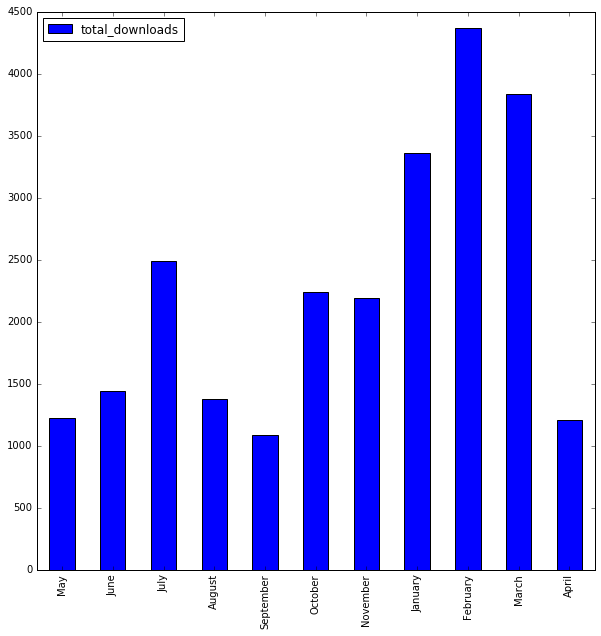

In [153]:
#  Sort and plot by month
months={0:"January", 1:"February", 2:"March", 3:"April", 4:"May", 5:"June", 6:"July", 7:"August", 8:"September", 9:"October", 10:"November", 11:"December"}
daily = daily_metrics.set_index('date')
ts = daily.total_downloads.resample('M', how='sum')
#  Relabel to month name
ts = pd.DataFrame(ts).set_index(pd.Series([4,5,6,7,8,9,10,0,1,2,3]).apply(lambda x: months[x]))
#  Plot
ts.plot(kind='bar', figsize=(10,10))

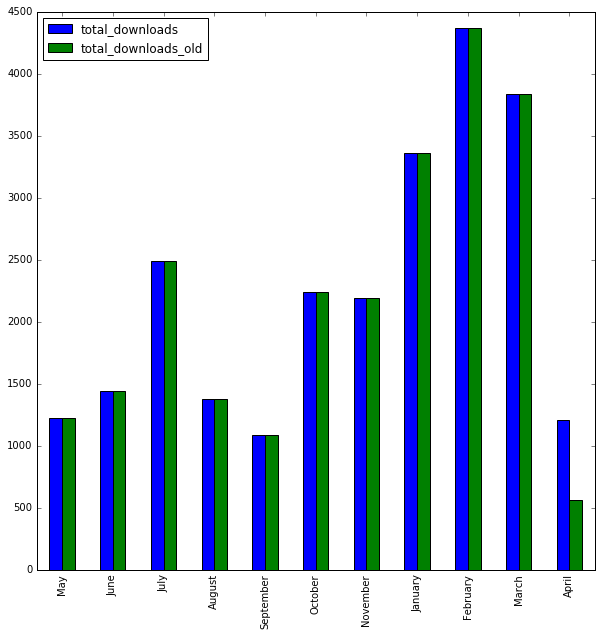

In [166]:
#  Sort and plot by month
months={0:"January", 1:"February", 2:"March", 3:"April", 4:"May", 5:"June", 6:"July", 7:"August", 8:"September", 9:"October", 10:"November", 11:"December"}
daily = daily_metrics.set_index('date')
daily_old = daily_metrics_old.set_index('date')
ts = daily.total_downloads.resample('M', how='sum')
ts_old = daily_old.total_downloads.resample('M', how='sum')
#  Relabel to month name
ts = pd.DataFrame(ts).set_index(pd.Series([4,5,6,7,8,9,10,0,1,2,3]).apply(lambda x: months[x]))
ts_old = pd.DataFrame(ts_old).set_index(pd.Series([4,5,6,7,8,9,10,0,1,2,3]).apply(lambda x: months[x]))
ts_old.columns = ['total_downloads_old']
#  Merge
compared = pd.merge(ts, ts_old, left_index=True, right_index=True)
#  Plot
compared.plot(kind='bar', figsize=(10,10))

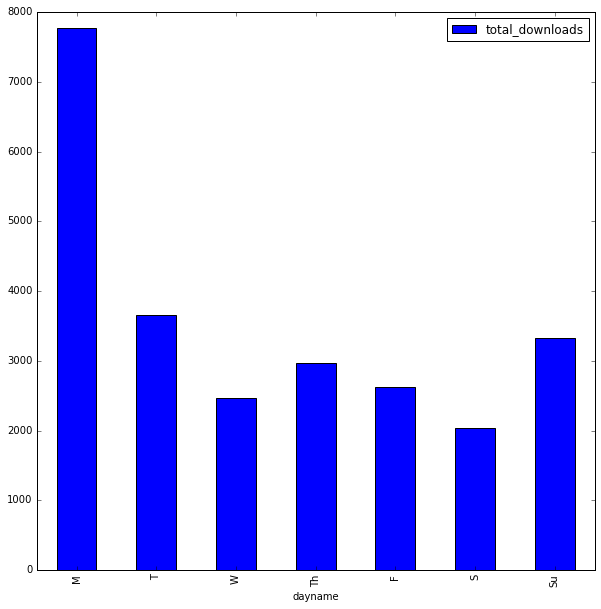

In [156]:
Sort and plot by day of week (0 is Monday)
xticklabels=['M','T','W','Th','F','S','Su']
daily_metrics=daily_metrics[['date','total_downloads']]
daily_metrics['day_of_week'] = daily_metrics.date.dt.weekday
ts = daily_metrics.pivot_table(index='day_of_week',values='total_downloads',aggfunc='sum')
ts = pd.DataFrame(ts)
ts['dayname'] = xticklabels
ts.plot(x='dayname',y='total_downloads', figsize=(10,10), kind='bar')

In [413]:
day_names={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday',6:'Sunday'}
month_names={0:"January", 1:"February", 2:"March", 3:"April", 4:"May", 5:"June", 6:"July", 7:"August", 8:"September", 9:"October", 10:"November", 11:"December"}
daily_metrics = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-04.csv", index_col=None, parse_dates=[0])
# daily_metrics=daily_metrics[['date','total_downloads']]
daily_metrics['day_of_week'] = daily_metrics.date.dt.weekday.apply(lambda x: day_names[x])
# daily_metrics['month'] = daily_metrics.date.dt.month#.apply(lambda x: month_names[x])
daily_metrics['year'] = daily_metrics.date.dt.year
daily_metrics.head()

,date,year,month,day,total_downloads,day_of_week
0,2015-06-01,2015,June,1,127,Monday
1,2015-06-02,2015,June,2,32,Tuesday
2,2015-06-03,2015,June,3,15,Wednesday
3,2015-06-04,2015,June,4,8,Thursday
4,2015-06-05,2015,June,5,36,Friday


In [96]:
import scripts.daily_data as daily_data

In [97]:
# get DataFrames from .csv files
daily, addition = daily_data.update_daily_csv("raw_data/daily-totals_2016-04-04.csv", "raw_data/2016-04-10_export_11343.csv")

In [98]:
# just need date and downloads
# set the date as the index
daily = daily[['date', 'total_downloads']].set_index('date')
addition = addition.set_index('date')

In [99]:
# update overlapping entries
daily.update(addition)

In [144]:
# daily.merge(addition, how='right', left_index=True, right_index=True)
new_df = pd.merge(daily, addition, how='right', left_index=True, right_index=True)
new_downloads = new_df[new_df.total_downloads_x.isnull()].total_downloads_y
new_downloads = pd.DataFrame(new_downloads)
new_downloads.columns = ['total_downloads']
daily = daily.append(new_downloads)
daily = daily.sort_index()

In [66]:
# daily.concat(addition, ignore_index=False)
# # daily.drop_duplicates()
# daily = daily.sort_index()
# # new_df = daily.merge(addition, left_index=True, right_index=True, how='left')
# # new_df
# daily

AttributeError: 'DataFrame' object has no attribute 'concat'

In [147]:
import os.path
filepath = '/Users/coreypetty/Library/Preferences/PyCharm2016.1/scratches/scratch_3/thisisfile.txt'
path = os.path.dirname(filepath)
path

'/Users/coreypetty/Library/Preferences/PyCharm2016.1/scratches/scratch_3'

In [151]:
filename = os.path.basename(filepath).split('.')
filename

['thisisfile', 'txt']